# Skin Lesions with K-Means Clustering


_Warning: The project involves graphic images of skin lesions, which may be sensitive or unsettling for some viewers. Viewer discretion is advised._

### Introduction

Skin lesion images (e.g. taken from dermatoscopes) are often very large and contain millions of pixels.

Using clustering algorithms like K-Means, the colors in the image can be grouped into K clusters to reduce the number of distinct colours in the image while preserving essential visual patterns.

Compressed images can be used in machine learning models (e.g. CNNs for skin cancer detection) or to highlight dominant patterns in lesions to make it easier for dermatologists to identify. 

### Methodology

In this project, I use a sample skin lesion image with a reduced pixel size for simplicity, showcasing the potential applications of unsupervised learning in medicine. 

The original image requires 24 bits (3 channels of the RBG, each 8 bits) for each of the 400 x 600 pixel locations. This results in a total size of 24x400x600 = 5,760,000 bits. 

Presenting the image in a compressed form required a dictionary with 30 colours (each of which requiring 24 bits), and the reformed image which requires 4 bits per pixel location. This gives a total number of 30x24+400x600x4 = 960,720 bits. 

The compressed image therefore takes up less than one sixth of the memory.

I will develop a basic K-Means Clustering model from scratch to enhance understanding and build intuition.

References: "_Unsupervised Learning, Recommenders, Reinforcement Learning_" by Andrew Ng on Coursera


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# find the index of the closest centroid for each data point

def find_closest_centroids(X, centroids):

    # Set K
    K = centroids.shape[0]
    # initiate idx to have same number of values as X
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range (X.shape[0]): # for each data point
        distance = []
        for j in range(K): # for each centroid
            norm_ij = np.linalg.norm(X[i] - centroids[j]) # calculate distance
            distance.append(norm_ij)
            
        idx[i]= np.argmin(distance)
    
    return idx

In [3]:
# compute the average of the points appointed to each centroid
def compute_centroids(X, idx, K):
    """
    idx: index of centroid that each point is assigned closest to
    K: number of centroids
    """
    
    # set variables for the shape of the data
    m, n = X.shape
    
    # set variable for returning the centroid points
    centroids = np.zeros((K, n))

    # find the mean of points with same index 
    for k in range(K):
        points = X[idx == k]
        centroids[k]=np.mean(points, axis=0)
    
    return centroids

In [4]:
# run the K-means algorithm 
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # initialise the values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    # run K-Means
    for i in range(max_iters):
        
        #show the progres
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # assign closest centroid to each example
        idx = find_closest_centroids(X, centroids)
            
        # compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [5]:
# randomly initiate the centroids
def kMeans_init_centroids(X, K):
    
    # reorder the indices of the data randomly
    randidx = np.random.permutation(X.shape[0])
    
    # take the first K indices as the starting centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [11]:
# load image of bird
original_img = plt.imread('skin_lesion.png')

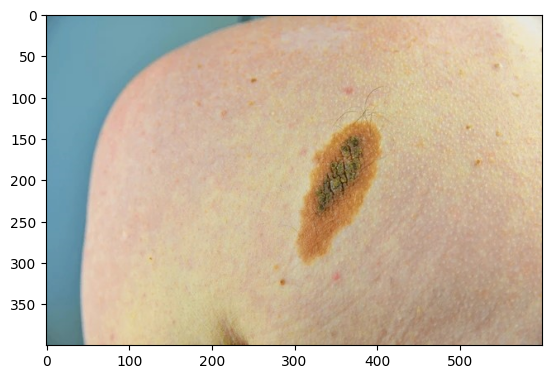

In [12]:
# show the image
plt.imshow(original_img)

In [13]:
# look at the shape of the image
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (400, 600, 4)


In [14]:
# remove alpha channel from the third index
rgb_img = original_img[:, :, :3]  

The shape of the image should now be a three-dimensional matrix, where the first two indices identify a pixel position, and the third index represents green, red or blue.

In [15]:
print("Shape of original_img is now:", rgb_img.shape)

Shape of original_img is now: (400, 600, 3)


In [16]:
# reshape matrix to a mx3 matrix, where m is the product of the pixel positioning
X_img = np.reshape(rgb_img, (rgb_img.shape[0] * rgb_img.shape[1], 3))

In [17]:
X_img

array([[0.32941177, 0.5058824 , 0.5803922 ],
       [0.33333334, 0.50980395, 0.58431375],
       [0.33333334, 0.5176471 , 0.5882353 ],
       ...,
       [0.60784316, 0.52156866, 0.46666667],
       [0.63529414, 0.5294118 , 0.4862745 ],
       [0.654902  , 0.54901963, 0.5058824 ]], dtype=float32)

In [107]:
# run K-Means on the pre-processed image
K = 30
max_iters = 10

# initiate the random centroids 
initial_centroids = kMeans_init_centroids(X_img, K)

# run the K-Means function on the image
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [108]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (240000,)
Closest centroid for the first five elements: [18 18 18 15 15]


In [109]:
# create a function to plot the colours of the image in a 3D graph
from mpl_toolkits.mplot3d import Axes3D

def plot_kMeans_RGB(X_img, centroids, idx, K):

    # 3D scatterplot
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111, projection='3d')

    # plot the centroids with red markers
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               color='red', marker='x', s=300, label='Centroids', alpha=1)
    
    # plot the different colours of each data point
    for i in range(K):
        cluster_points = X_img[idx == i]  # find the points assigned to the cluster
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=cluster_points,
                   label=f"Cluster {i}", alpha=0.1, s=0.5)


    # axes
    ax.set_xlabel('Red value')
    ax.set_ylabel('Green value')
    ax.set_zlabel('Blue value')

    # title
    ax.set_title("Cluster centroids and the original colours")
    plt.show()


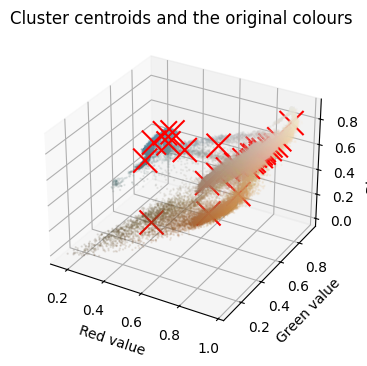

In [110]:
plot_kMeans_RGB(X_img, centroids, idx, K)

In [111]:
# create a function to show the colours of the centroids
def show_centroid_colours(centroids):

    # determine the number of colours by the number of centroids
    num_colours = centroids.shape[0]

    # create figure
    plt.figure(figsize=(16, 1))
    plt.bar(range(num_colours), [1] * num_colours, color=centroids, edgecolor="none", width=1)

    # labels
    plt.xticks(range(num_colours), range(num_colours))
    plt.yticks([])
    plt.title("Centroid Colours")
    plt.show()


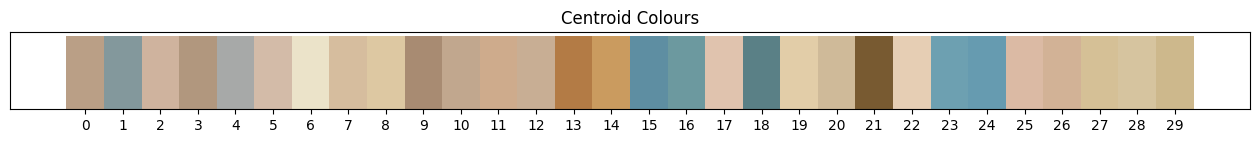

In [112]:
show_centroid_colours(centroids)

In [113]:
## compress the image
# for each pixel, find the closest centroid
idx = find_closest_centroids(X_img, centroids)

# replace each pixel colour with the closest centroid
X_compressed = centroids[idx, :] 

# reshape the image back to original shape
X_compressed = np.reshape(X_compressed, rgb_img.shape) 

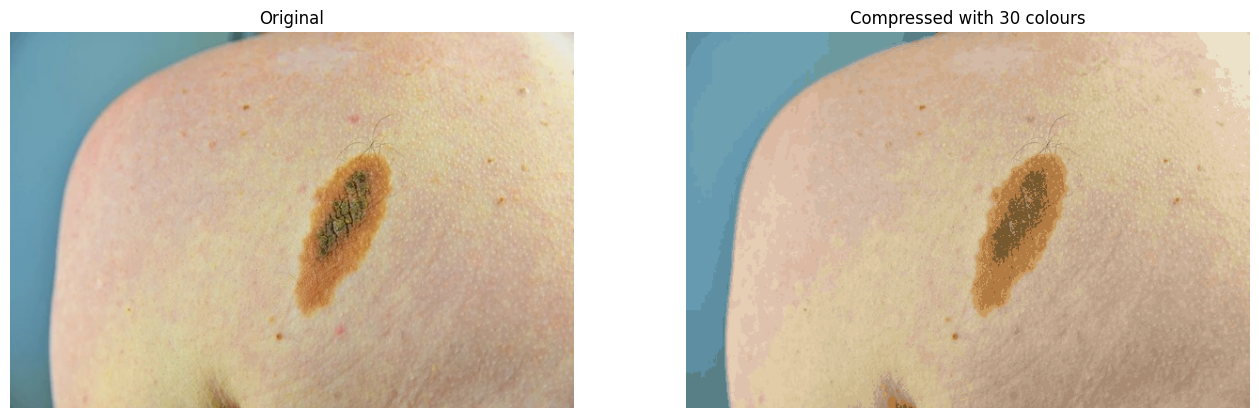

In [114]:
## compare the original image with the compressed image
# display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()